<a href="https://colab.research.google.com/github/dhsingh0815/ML/blob/main/DL/RNN_WeatherPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df=pd.read_csv('/content/seattle-weather.csv')
#train_df = pd.read_csv('C:\\Users\\vijay\\Desktop\\svit deep learning\\CNN Image Processing\\Mnist_Fashion Data\\fashion-mnist_train.csv')
#test_df = pd.read_csv('C:\\Users\\vijay\\Desktop\\svit deep learning\\CNN Image Processing\\Mnist_Fashion Data\\fashion-mnist_test.csv')

df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
#coulmn Open converted into numpy array
# Select all rows (:,) [:,2:3] and column location 2(inclusive), 3 (exclusive) essentially 3rd column which is temp_max
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [ ]:
len(training_set)

1461

In [ ]:
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]
# training_set is 1 D array, i-10(inclusive):i(excluisve), - select consecutive 10 rows, 0th column
 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    # training_set is 1 D array, i, - select single value at row i, 0th column
    y_train.append(training_set[i,0])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [ ]:
WINDOW = 10
X,y = df_to_XY(df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


Training Set (X_train, y_train):

Contains the first 800 sequences (X) and their corresponding labels (y). This is used to train your model.



Validation Set (X_val, y_val):

Contains sequences 800 to 999 (X[800:1000]) and their labels (y[800:1000]). This set is used to tune hyperparameters and monitor the model’s performance during training.



Test Set (X_test, y_test):

Contains sequences from index 1000 onwards (X[1000:]) and their labels (y[1000:]). This set is used to evaluate the final model performance after training and validation are complete.

In [ ]:
#Reshaping(To add new dimensions)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
#Building the RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()

In [ ]:
#Addinf the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units=1))

In [ ]:
#Compiling
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 [==============================] - 6s 56ms/step - loss: 207.8463 - val_loss: 252.4958
Epoch 2/100
25/25 [==============================] - 0s 11ms/step - loss: 91.8511 - val_loss: 154.3039
Epoch 3/100
25/25 [==============================] - 0s 10ms/step - loss: 67.4185 - val_loss: 122.8848
Epoch 4/100
25/25 [==============================] - 0s 10ms/step - loss: 59.2776 - val_loss: 106.2413
Epoch 5/100
25/25 [==============================] - 0s 10ms/step - loss: 57.5896 - val_loss: 95.8663
Epoch 6/100
25/25 [==============================] - 0s 10ms/step - loss: 56.0702 - val_loss: 88.0931
Epoch 7/100
25/25 [==============================] - 0s 10ms/step - loss: 53.9204 - val_loss: 83.9785
Epoch 8/100
25/25 [==============================] - 0s 10ms/step - loss: 55.2708 - val_loss: 81.0915
Epoch 9/100
25/25 [==============================] - 0s 12ms/step - loss: 54.3311 - val_loss: 79.2000
Epoch 10/100
25/25 [==============================] - 0s 10ms/step - loss: 53

Epoch 81/100
25/25 [==============================] - 0s 10ms/step - loss: 8.2838 - val_loss: 9.9748
Epoch 82/100
25/25 [==============================] - 0s 10ms/step - loss: 8.7313 - val_loss: 9.7690
Epoch 83/100
25/25 [==============================] - 0s 11ms/step - loss: 9.0139 - val_loss: 9.9389
Epoch 84/100
25/25 [==============================] - 0s 10ms/step - loss: 8.1992 - val_loss: 9.5899
Epoch 85/100
25/25 [==============================] - 0s 12ms/step - loss: 8.2899 - val_loss: 9.6413
Epoch 86/100
25/25 [==============================] - 0s 10ms/step - loss: 8.7938 - val_loss: 10.2962
Epoch 87/100
25/25 [==============================] - 0s 11ms/step - loss: 8.3481 - val_loss: 9.5731
Epoch 88/100
25/25 [==============================] - 0s 10ms/step - loss: 8.0935 - val_loss: 9.5972
Epoch 89/100
25/25 [==============================] - 0s 11ms/step - loss: 8.1016 - val_loss: 9.6648
Epoch 90/100
25/25 [==============================] - 0s 10ms/step - loss: 8.2846 - val_lo

In [ ]:
his = pd.DataFrame(history.history)

In [ ]:
his.head()

,loss,val_loss
0,207.846313,252.495834
1,91.851143,154.303940
2,67.418541,122.884811
3,59.277626,106.241257
4,57.589622,95.866318


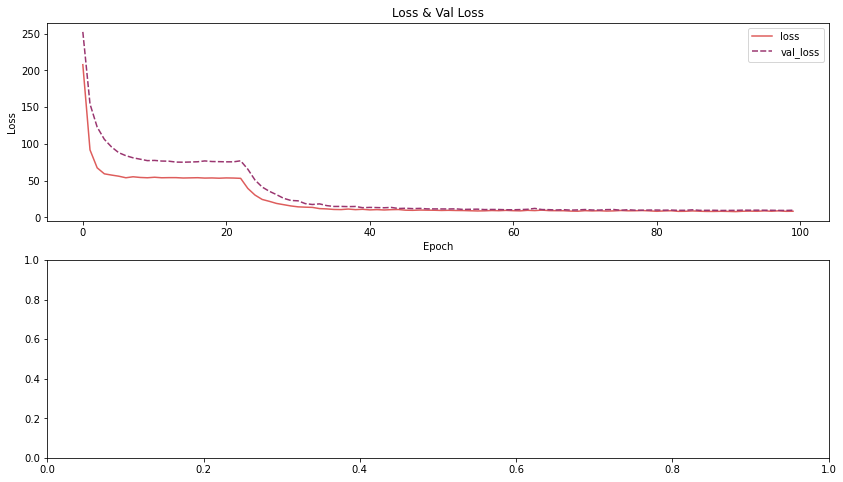

In [ ]:
import seaborn as sns
his.columns
history_loss = his[['loss', 'val_loss']]
# Assuming history_loss is already defined correctly
fig, axes = plt.subplots(2, 1, figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.title("Loss & Val Loss")
sns.lineplot(data=history_loss, palette="flare")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

15/15 [==============================] - 0s 4ms/step


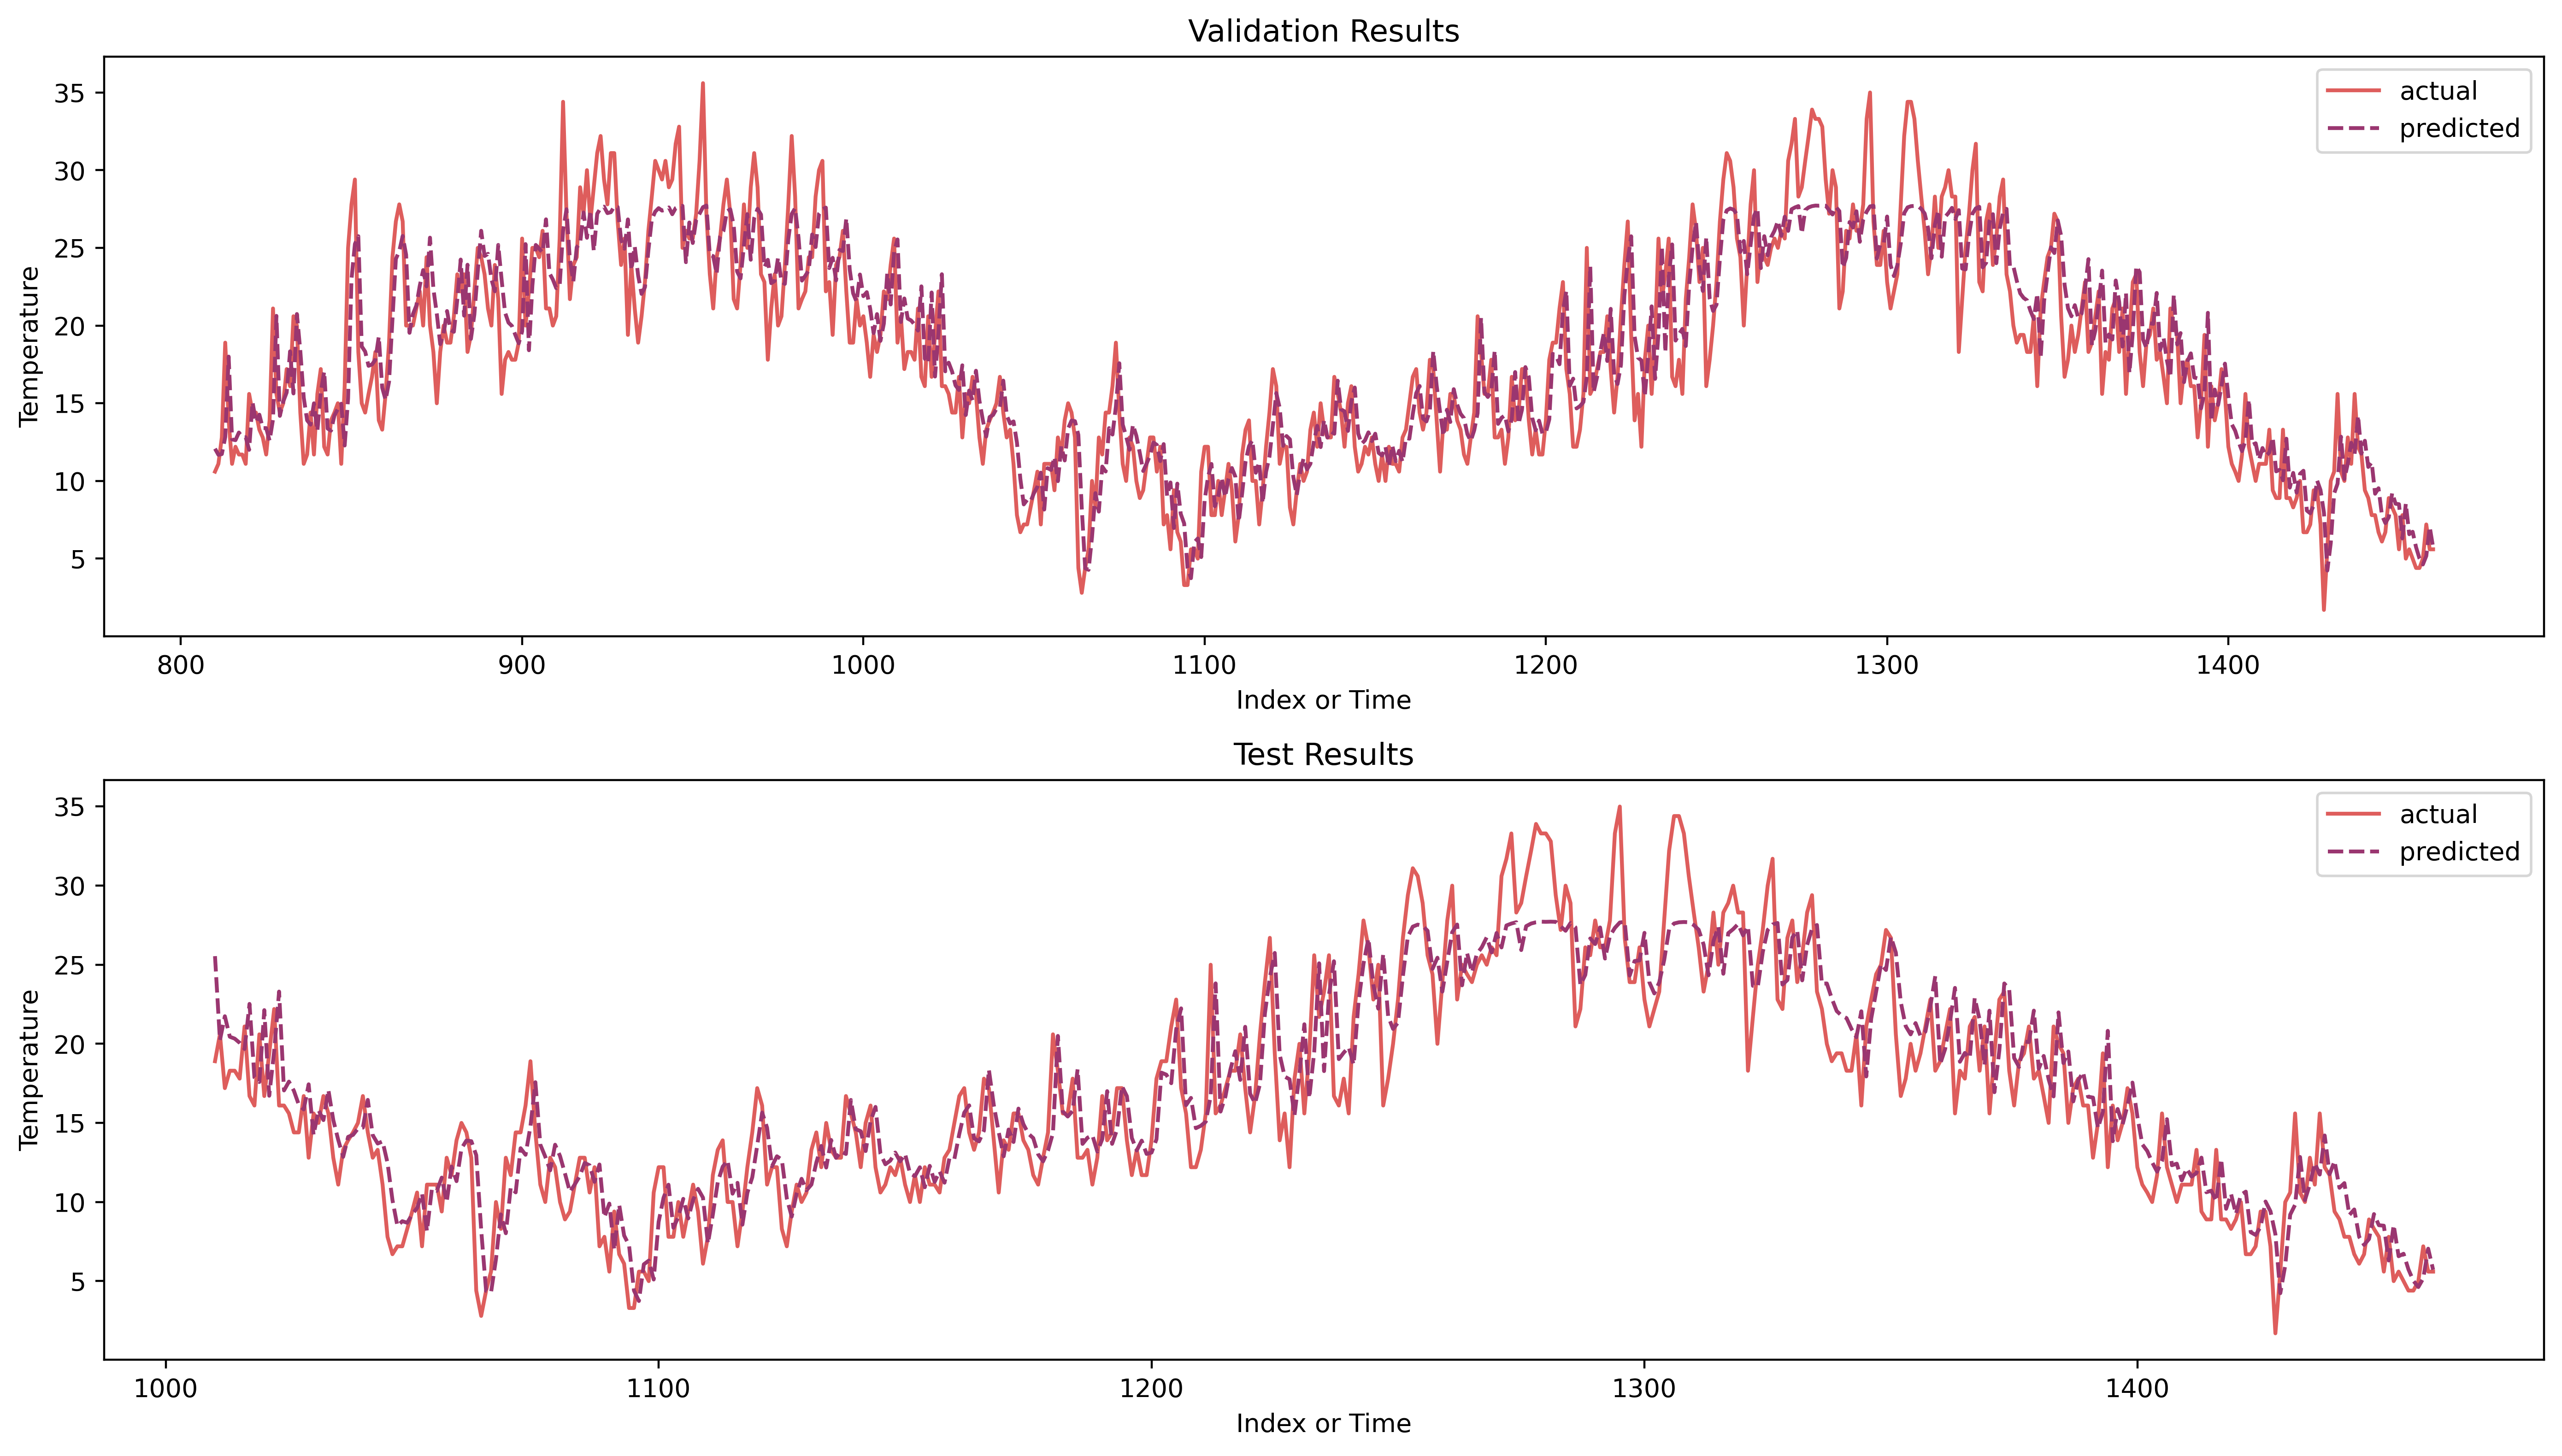

In [ ]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred


fig, axes = plt.subplots(2, 1, figsize=(14, 8), dpi=400)

# Plot for Validation Results
plt.subplot(2, 1, 1)
plt.title("Validation Results")
sns.lineplot(data=df_pred[800:], palette="flare")
plt.xlabel('Index or Time')  # Replace with appropriate x-axis label
plt.ylabel('Temperature')    # Replace with appropriate y-axis label

# Plot for Test Results
plt.subplot(2, 1, 2)
plt.title("Test Results")
sns.lineplot(data=df_pred[1000:], palette="flare")
plt.xlabel('Index or Time')  # Replace with appropriate x-axis label
plt.ylabel('Temperature')    # Replace with appropriate y-axis label

plt.tight_layout()
plt.show()
